# Black Friday Sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train =pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.shape

(550068, 12)

In [6]:
test.shape

(233599, 11)

# Data Analysis

In [7]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
train.User_ID.nunique()

5891

In [9]:
train.Product_ID.nunique()

3631

# Univariate Analysis

C:\Users\Prerna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


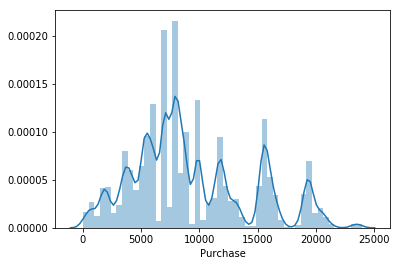

In [10]:
#Distribution of all num variables
sns.distplot(train['Purchase'])

The distribution is normal

In [11]:
#Checking for skewness

train['Purchase'].skew()

0.6001400037087128

In [12]:
train.skew()

User_ID               0.003066
Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2   -0.162758
Product_Category_3   -0.765446
Purchase              0.600140
dtype: float64

In [13]:
from scipy.stats import kurtosis

In [14]:
train.kurtosis()

User_ID              -1.195501
Occupation           -1.216114
Marital_Status       -1.864997
Product_Category_1    1.234757
Product_Category_2   -1.432267
Product_Category_3   -0.808066
Purchase             -0.338378
dtype: float64

C:\Users\Prerna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


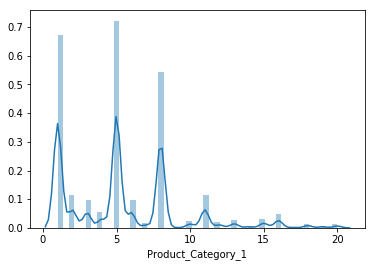

In [15]:
sns.distplot(train['Product_Category_1'])

Column Product_Category_1 is bit skewed and seems to have some outliers

In [16]:
train.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [17]:
train.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

# Bivariate Analysis

Categorical features and Target variable Purchase relationship

In [18]:
#Relationship between catg variables and Purchase
catg_features = train.select_dtypes(include='object').columns
catg_features = catg_features[1:]

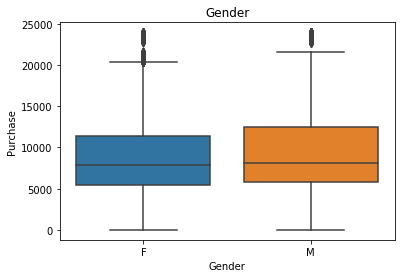

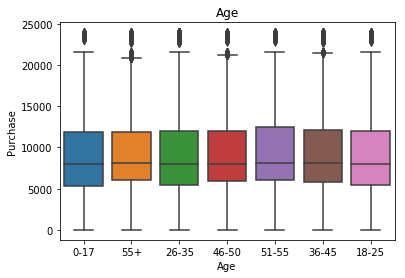

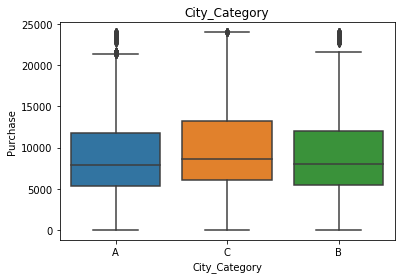

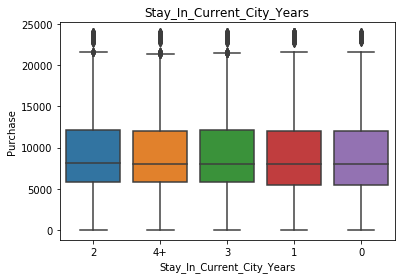

In [19]:
for catg in catg_features:
    sns.boxplot(train[catg],train['Purchase'])
    plt.xlabel(catg)
    plt.ylabel('Purchase')
    plt.title(catg)
    plt.show()
    

There is not much of a difference but Male and people in City_Category 'C' tend to purchase more.

In [20]:
train.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

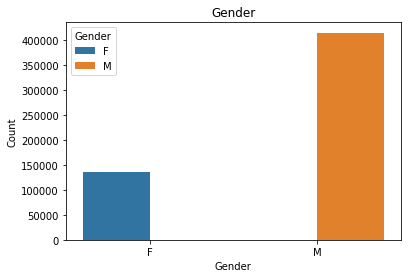

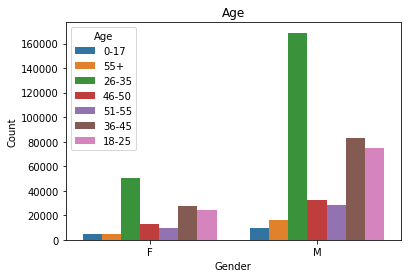

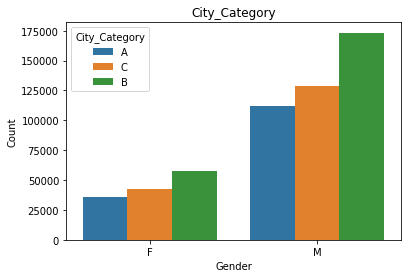

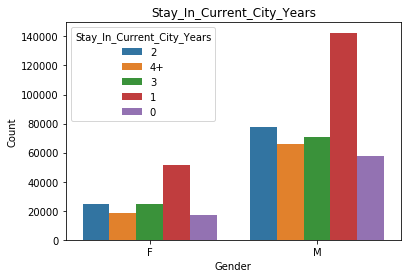

In [21]:
#Further more analysis
for catg in catg_features:
    sns.countplot(train['Gender'],hue = train[catg])
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title(catg)
    plt.show()


'Male' of age between '26-35' belonging to City Category 'B' who have stayed in Current City for '1 year' purchase more than Female.

# Numeric Variables relationship with Purchase

In [22]:
num_features = train.select_dtypes(include=['int64','float64']).columns
num_features

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [23]:
num_features = num_features[1:6]
num_features

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

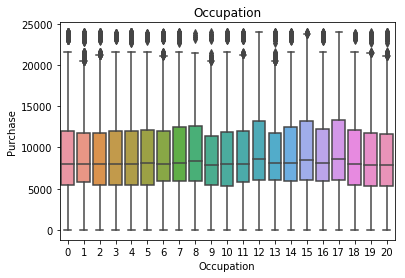

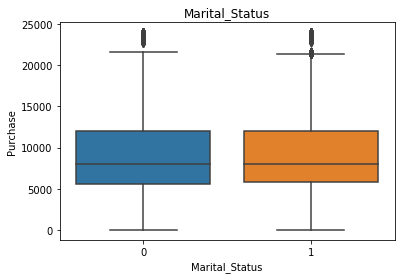

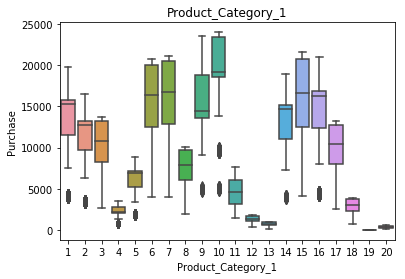

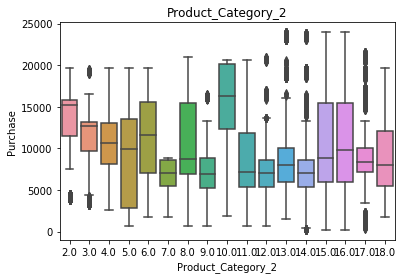

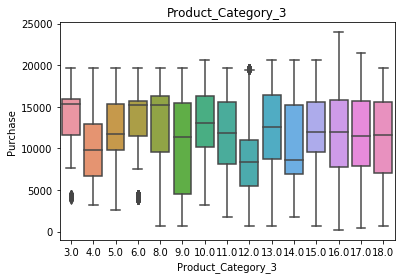

In [24]:
for cols in num_features:
    sns.boxplot(train[cols],train['Purchase'])
    plt.ylabel('Purchase')
    plt.xlabel(cols)
    plt.title(cols)
    plt.show()

There are few outliers which can be considered in Product Category 1,2 and 3. For now we will run the model as it is.

# Data Imputation of missing values

In [25]:
#Dealing with missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [26]:
train.isnull().sum()/550068

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

Product category 3 seems to have lot of missing values. We will keep it and put '0' in nan values

Analyze Product Category 2 with other features

In [27]:
#Drop User Id and Product Id since they are not very imp to us
train.drop(columns=['User_ID','Product_ID'],inplace=True)
test.drop(columns=['User_ID','Product_ID'],inplace=True)

In [28]:
all_features = train.columns
all_features

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [29]:
all_features = all_features[:7]
all_features

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1'],
      dtype='object')

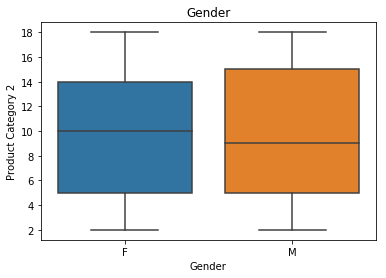

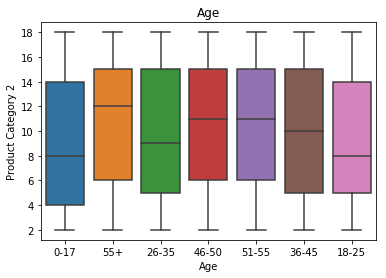

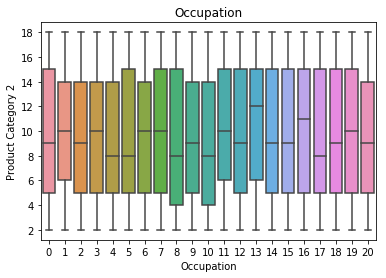

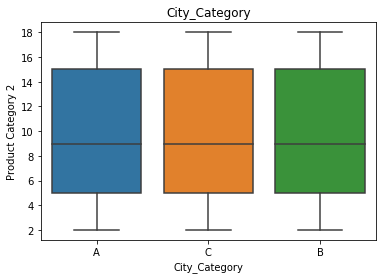

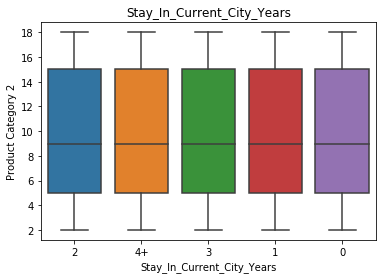

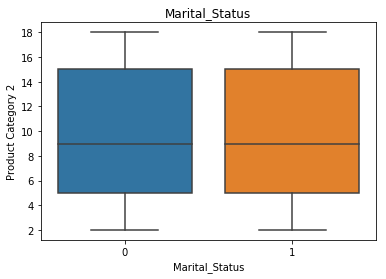

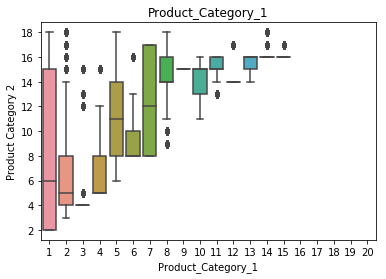

In [30]:
for catg in all_features:
    sns.boxplot(train[catg],train['Product_Category_2'])
    plt.xlabel(catg)
    plt.ylabel('Product Category 2')
    plt.title(catg)
    plt.show()

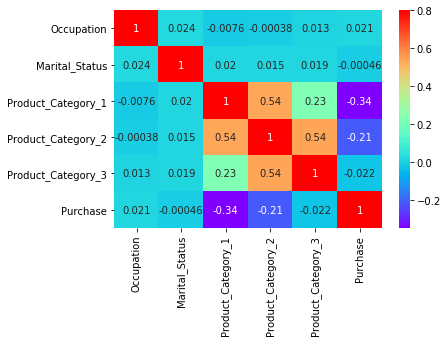

In [31]:
sns.heatmap(train.corr(),vmax=0.8,cmap='rainbow',annot=True)

In [32]:
train.groupby('Age')['Product_Category_2'].median()

Age
0-17      8.0
18-25     8.0
26-35     9.0
36-45    10.0
46-50    11.0
51-55    11.0
55+      12.0
Name: Product_Category_2, dtype: float64

In [33]:
train['Product_Category_2'].median()

9.0

In [34]:
train.groupby('Gender')['Product_Category_2'].median()

Gender
F    10.0
M     9.0
Name: Product_Category_2, dtype: float64

In [35]:
def impute_Catg2(cols):
    Age = cols[0]
    Product_Category_2 = cols[1]
    
    if pd.isnull(Product_Category_2):
        if Age == "0-17":
            return 8
        elif Age == "18-25":
            return 8
        elif Age == "26-35":
            return 9
        elif Age == "36-45":
            return 10
        elif Age == "46-50":
            return 11
        elif Age == "51-55":
            return 11
        else:
            return 12
        
    else:
        return Product_Category_2
        
        

In [36]:
train['Product_Category_2'] = train[['Age','Product_Category_2']].apply(impute_Catg2,axis = 1)

In [37]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,12.0,NaN,7969


In [38]:
train.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [39]:
test.groupby('Age')['Product_Category_2'].median()

Age
0-17      8.0
18-25     8.0
26-35     9.0
36-45    10.0
46-50    11.0
51-55    11.0
55+      12.0
Name: Product_Category_2, dtype: float64

In [40]:
test['Product_Category_2'] = test[['Age','Product_Category_2']].apply(impute_Catg2,axis = 1)

In [41]:
test.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            162562
dtype: int64

In [42]:
train['Product_Category_3'] = train['Product_Category_3'].fillna(train.Product_Category_3.median())

In [43]:
test['Product_Category_3'] = test['Product_Category_3'].fillna(test.Product_Category_3.median())

In [44]:
train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [45]:
train.head(20)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,14.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,14.0,1422
3,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,M,55+,16,C,4+,0,8,12.0,14.0,7969
5,M,26-35,15,A,3,0,1,2.0,14.0,15227
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,M,46-50,7,B,2,1,1,15.0,14.0,15854
8,M,46-50,7,B,2,1,1,16.0,14.0,15686
9,M,26-35,20,A,1,1,8,9.0,14.0,7871


In [46]:
#Now lets use one hot encoding on catg variables

catg_col = train.select_dtypes(include='object').columns
catg_col

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

In [47]:
one_hot = pd.get_dummies(train[catg_col],drop_first=True)
one_hot_test = pd.get_dummies(test[catg_col],drop_first=True)

In [48]:
train.drop(columns=catg_col,inplace=True)

In [49]:
test.drop(columns=catg_col,inplace=True)

In [50]:
train_df = pd.concat([train,one_hot],axis=1)

In [51]:
test_df = pd.concat([test,one_hot_test],axis=1)

In [52]:
train_df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,8.0,14.0,8370,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,12,8.0,14.0,1422,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10,0,12,14.0,14.0,1057,0,0,0,0,0,0,0,0,0,0,1,0,0
4,16,0,8,12.0,14.0,7969,1,0,0,0,0,0,1,0,1,0,0,0,1


In [53]:
test_df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,7,1,1,11.0,14.0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,17,0,3,5.0,14.0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,5,14.0,14.0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,1,4,9.0,14.0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,1,0,4,5.0,12.0,0,0,1,0,0,0,0,0,1,1,0,0,0


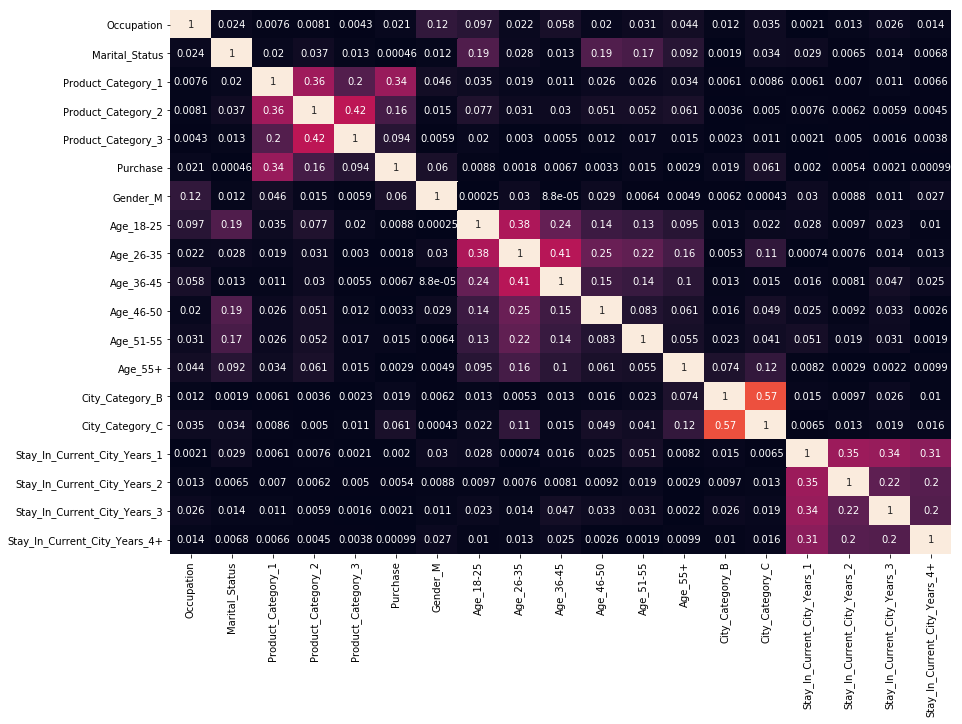

In [54]:
#Checking correlation
plt.figure(figsize=(14,10))
sns.heatmap(train_df.corr().abs(),annot=True,vmax=0.9,cbar=False)
plt.show()

Product Category 1 seems to have some correlation with Purchase

# Buidling model and Train test split

In [55]:
#Build the model
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [56]:
X= train_df.drop(columns=['Purchase'])
y= train_df.Purchase

In [57]:
#Split the dataset into train and test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Fit the model

In [61]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
lreg.score(X_test,y_test)

0.12376896289237538

In [63]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [64]:
dtreg.score(X_test,y_test)

0.5640873814767131

In [65]:
import xgboost

reg = RandomizedSearchCV(xgboost.XGBRegressor(),
                        {'learning_rate':[0.1,0.3,0.5],
                    'min_child_weight': [1,3,5],
                    'gamma': [0.0,0.1,0.2],
                    'max_depth':[4,5,6],
                    'n_estimators':[200,500,1000]                            
                        },n_iter=2,cv=5,verbose=5,return_train_score=False)

In [66]:
reg.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0 
[CV]  n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0, score=0.6672035821219426, total= 2.7min
[CV] n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV]  n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0, score=0.6702440248766428, total= 2.8min
[CV] n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.6min remaining:    0.0s


[CV]  n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0, score=0.670926530190421, total= 2.9min
[CV] n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.4min remaining:    0.0s


[CV]  n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0, score=0.66748308885302, total= 2.8min
[CV] n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.2min remaining:    0.0s


[CV]  n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.0, score=0.6760576905268599, total= 2.8min
[CV] n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.0 
[CV]  n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.0, score=0.6685617729603383, total= 2.9min
[CV] n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.0 
[CV]  n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.0, score=0.6715197541370805, total= 2.8min
[CV] n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.0 
[CV]  n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.0, score=0.6724446681098175, total= 2.8min
[CV] n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.0 
[CV]  n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.0, score=0.668728432985841, total= 2.8min
[CV] n_estimators=500,

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 28.6min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
          fit_params=None, iid=True, n_iter=2, n_jobs=1,
          param_distributions={'learning_rate': [0.1, 0.3, 0.5], 'min_child_weight': [1, 3, 5], 'gamma': [0.0, 0.1, 0.2], 'max_depth': [4, 5, 6], 'n_estimators': [200, 500, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=False, scoring=None, verbose=5)

In [67]:
reg.cv_results_

{'mean_fit_time': array([167.34930639, 173.83289919]),
 'std_fit_time': array([ 2.5084764 , 12.03034329]),
 'mean_score_time': array([0.90388184, 0.89373674]),
 'std_score_time': array([0.03044022, 0.01361687]),
 'param_n_estimators': masked_array(data=[500, 500],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[5, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[4, 4],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.3, 0.5],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.0, 0.0],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 500,
   'min_child_weight': 5,
   'max_depth': 4,
   'learning_rate': 0.

In [68]:
reg.best_score_

0.6717197300627481

In [69]:
reg.best_params_

{'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.5,
 'gamma': 0.0}

In [70]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [71]:
rfreg = RandomForestRegressor()

In [72]:
rfreg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
rfreg.score(X_test,y_test)

0.6184675280223121

XGBoost is identified as best model based on score

In [76]:
regressor = xgboost.XGBRegressor(learning_rate=0.5,max_depth=4,min_child_weight=1,n_estimators=500,gamma=0.0)

In [77]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.5, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=500, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [78]:
regressor.score(X_test,y_test)

0.665971180852658

# Prediction and Evaluation

In [79]:
pred = regressor.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
rmse = np.sqrt(mean_squared_error(y_test,pred))

In [82]:
rmse

2895.5326013448807

# Actual prediction of test set

In [83]:
actual_pred = regressor.predict(test_df)

In [84]:
#Read sample file
sample = pd.read_csv('sample_submission.csv')


In [85]:
predict_df = pd.DataFrame(actual_pred,columns=['Purchase'])

In [86]:
final_data = pd.concat([predict_df,sample[['User_ID','Product_ID']]],axis =1)

# Write the file to csv

In [87]:
final_data.to_csv('test_prediction.csv',index=False)

In [ ]:
To predict the Purchase amount of Customers we tried to understand their behaviour by doing EDA.
1. We understood that Male tend to purchase more than Femal.
2. Customers belonging to age group 26-35 purchase more.
3. Customers belonging to City Category 'B' purchase more.
4. Customers who have been living in a city from past 1 year purchase more.
5. Product_Category_1 is the most important variable to predict the purchase amount.

The best model that could fit is XGBoost method.
We achieved an RMSE score of 2895.532.